# Семинар №6

In [1]:
import cv2
import numpy as np
import sklearn
import skimage.segmentation
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering
import skimage.io

import matplotlib.pyplot as plt

import time as time
import scipy as sp

In [2]:
# вспомогательная функция
def plot_one_image(src_image, is_gray=False):
    """
    Отрисовать с помощью plt исходное изображение.
    
    :param src_image: np.ndarray: исходное изображение
    :param is_gray: bool: флаг для отображения ЧБ изображений
    :return: None
    """
    fig, m_axs = plt.subplots(1, 1, figsize=(6.4*2, 4.8*2), constrained_layout=False)
    ax1 = m_axs

    cmap = 'gray' if is_gray else None
    ax1.set_title('Исходное изображение')
    ax1.imshow(src_image, cmap=cmap)
    ax1.set_xticks([]), ax1.set_yticks([])
    plt.show()

In [3]:
# вспомогательная функция
def plot_transform_result(src_image, transform_image, is_gray=False):
    """
    Отрисовать с помощью plt исходное изображение и его преобразование.
    
    :param src_image: np.ndarray: исходное изображение
    :param transform_image: np.ndarray: преобразованное изображение
    :param is_gray: bool: флаг для отображения ЧБ изображений
    :return: None
    """
    fig, m_axs = plt.subplots(1, 2, figsize=(6.4*2, 4.8*2), constrained_layout=False)
    ax1, ax2 = m_axs

    cmap = 'gray' if is_gray else None
    ax1.set_title('Исходное изображение')
    ax1.imshow(src_image, cmap=cmap)
    ax1.set_xticks([]), ax1.set_yticks([])
    ax2.set_title('Результат преобразования')
    ax2.imshow(transform_image, cmap=cmap)
    ax2.set_xticks([]), ax2.set_yticks([])
    plt.show()

# Вспомним про kNN 

In [4]:
# Generate data
image = skimage.io.imread('img/cat.jpg')
image = skimage.transform.resize(image, tuple(map(int, np.array(image.shape[:2])/2)))
X = np.reshape(image, (-1, 1))

In [5]:
X.shape

(169860, 1)

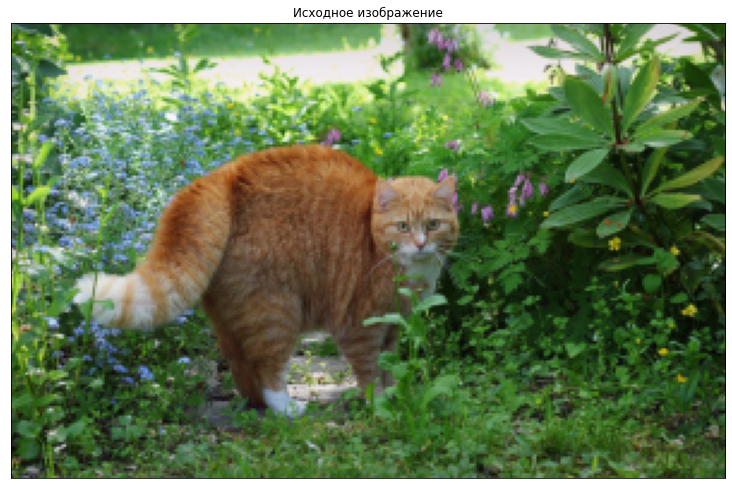

In [6]:
plot_one_image(image)

In [7]:
n_clusters = 3  # number of regions
kmeans = sklearn.cluster.KMeans(n_clusters=n_clusters, n_init=40, max_iter=500).fit(X)
label = np.reshape(kmeans.labels_, image.shape)

/var/folders/tm/8y1pdv8929z52bhjsbz6r18c0000gn/T/ipykernel_15636/3124328972.py:9: UserWarning: The following kwargs were not used by contour: 'contours'
  plt.contour(tmp[:, :, 0], contours=1,


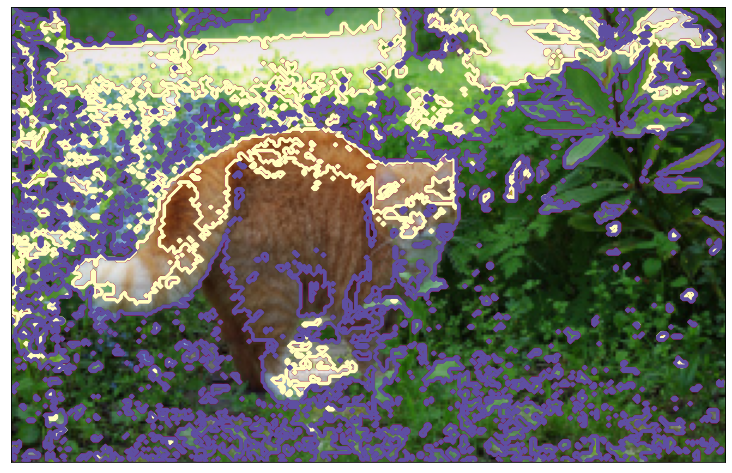

In [8]:
# Plot the results on an image
cmap = plt.cm.get_cmap('Spectral', n_clusters)
rgba = cmap(np.linspace(0, 1, n_clusters))

plt.figure(figsize=(6.4*2, 4.8*2), constrained_layout=False)
plt.imshow(image, cmap=plt.cm.gray)
for l in range(n_clusters):
    tmp = label == l
    plt.contour(tmp[:, :, 0], contours=1,
               colors=[rgba[l]])
plt.xticks(())
plt.yticks(())
plt.show()

## Difference of spaces

In [9]:
image_ = skimage.color.rgb2hsv(image)
X = np.reshape(image_[:, :, 0], (-1, 1))

In [10]:
n_clusters = 3  # number of regions
kmeans = sklearn.cluster.KMeans(n_clusters=n_clusters, init='k-means++', 
                                n_init=40, algorithm='elkan',
                                max_iter=1000, n_jobs=-1).fit(X)
label = np.reshape(kmeans.labels_, image[:, :, 0].shape)

/Users/keleas/miniconda3/envs/general/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


/var/folders/tm/8y1pdv8929z52bhjsbz6r18c0000gn/T/ipykernel_15636/204688628.py:9: UserWarning: The following kwargs were not used by contour: 'contours'
  plt.contour(tmp[:, :], contours=1,


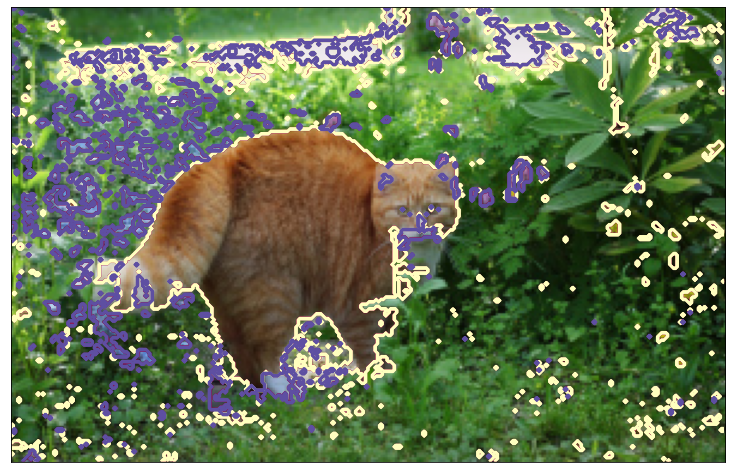

In [11]:
# Plot the results on an image
cmap = plt.cm.get_cmap('Spectral', n_clusters)
rgba = cmap(np.linspace(0, 1, n_clusters))

plt.figure(figsize=(6.4*2, 4.8*2), constrained_layout=False)
plt.imshow(image, cmap=plt.cm.gray)
for l in range(n_clusters):
    tmp = label == l
    plt.contour(tmp[:, :], contours=1,
               colors=[rgba[l]])
plt.xticks(())
plt.yticks(())
plt.show()

# Agglomerative clustering

In [12]:
# Generate data
image = skimage.io.imread('img/cat.jpg')
image = skimage.transform.resize(image, tuple(map(int, np.array(image.shape[:2])/2)))
X = np.reshape(image, (-1, 1))

## Algo

In [13]:
# Define the structure A of the data. Pixels connected to their neighbors.
connectivity = grid_to_graph(*image.shape)

# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=3,
        linkage='ward', connectivity=connectivity, distance_threshold=None).fit(X)

label = np.reshape(ward.labels_, image.shape)
print("Elapsed time: ", time.time() - st)
print("Number of pixels: ", label.size)
print("Number of clusters: ", np.unique(label).size)

Compute structured hierarchical clustering...
Elapsed time:  15.377392053604126
Number of pixels:  169860
Number of clusters:  3


## Plot clustering result

/var/folders/tm/8y1pdv8929z52bhjsbz6r18c0000gn/T/ipykernel_15636/2753331198.py:9: UserWarning: The following kwargs were not used by contour: 'contours'
  plt.contour(tmp[:, :, 0], contours=1,


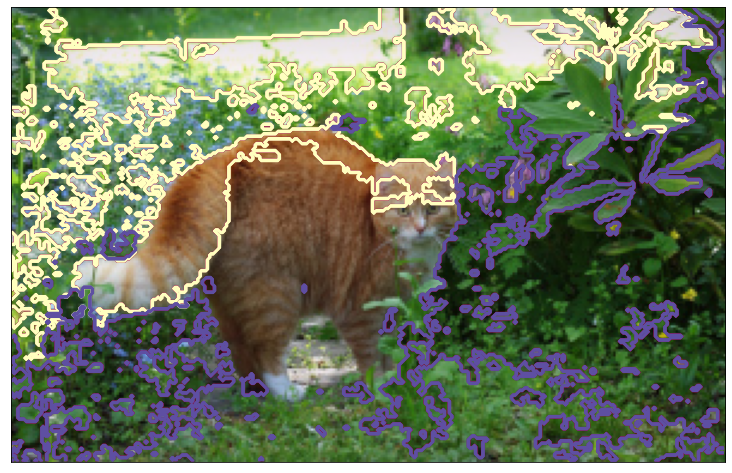

In [14]:
# Plot the results on an image
cmap = plt.cm.get_cmap('Spectral', np.unique(label).size)
rgba = cmap(np.linspace(0, 1, np.unique(label).size))

plt.figure(figsize=(6.4*2, 4.8*2), constrained_layout=False)
plt.imshow(image, cmap=plt.cm.gray)
for l in range(np.unique(label).size):
    tmp = label == l
    plt.contour(tmp[:, :, 0], contours=1,
               colors=[rgba[l]])
plt.xticks(())
plt.yticks(())
plt.show()

# Mean-shift clustering

In [15]:
# Generate data
image = skimage.io.imread('img/cat.jpg')
image = skimage.transform.resize(image, tuple(map(int, np.array(image.shape[:2])/2)))

## Algo

In [16]:
label = skimage.segmentation.quickshift(image, kernel_size=20, max_dist=6,
                                                 ratio=0.5,
                                                 convert2lab=False)

In [17]:
n_clusters = np.unique(label).max()
print(n_clusters)

35


## Plot clustering result

/var/folders/tm/8y1pdv8929z52bhjsbz6r18c0000gn/T/ipykernel_15636/204688628.py:9: UserWarning: The following kwargs were not used by contour: 'contours'
  plt.contour(tmp[:, :], contours=1,


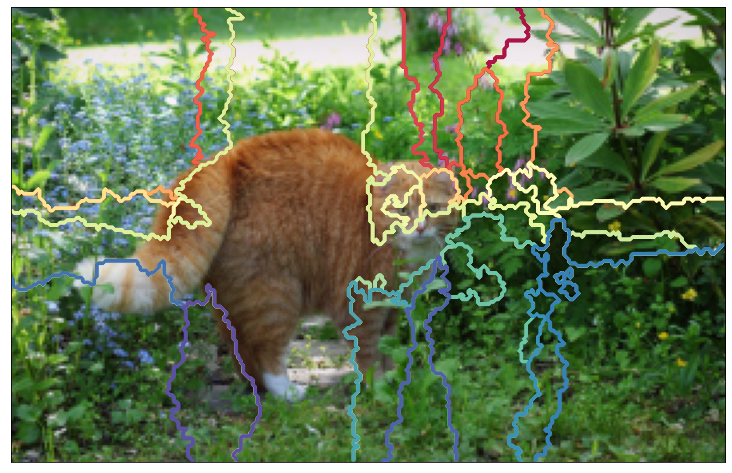

In [18]:
# Plot the results on an image
cmap = plt.cm.get_cmap('Spectral', n_clusters)
rgba = cmap(np.linspace(0, 1, n_clusters))

plt.figure(figsize=(6.4*2, 4.8*2), constrained_layout=False)
plt.imshow(image, cmap=plt.cm.gray)
for l in range(n_clusters):
    tmp = label == l
    plt.contour(tmp[:, :], contours=1,
               colors=[rgba[l]])
plt.xticks(())
plt.yticks(())
plt.show()

## Felzenszwalb algo

In [19]:
label = skimage.segmentation.felzenszwalb(image, scale=100, sigma=0.5, min_size=50)

/var/folders/tm/8y1pdv8929z52bhjsbz6r18c0000gn/T/ipykernel_15636/477123883.py:11: UserWarning: The following kwargs were not used by contour: 'contours'
  plt.contour(tmp[:, :], contours=1,


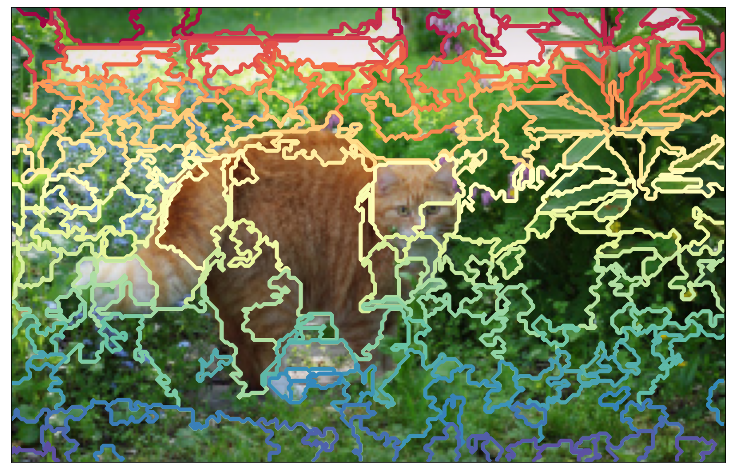

In [20]:
n_clusters = np.unique(label).max()

# Plot the results on an image
cmap = plt.cm.get_cmap('Spectral', n_clusters)
rgba = cmap(np.linspace(0, 1, n_clusters))

plt.figure(figsize=(6.4*2, 4.8*2), constrained_layout=False)
plt.imshow(image, cmap=plt.cm.gray)
for l in range(n_clusters):
    tmp = label == l
    plt.contour(tmp[:, :], contours=1,
               colors=[rgba[l]])
plt.xticks(())
plt.yticks(())
plt.show()

# Segmentation metrics

In [21]:
true_mask = np.zeros((400, 400, 3))
true_mask[50:100, 30:370] = 1

pred_mask = np.zeros((400, 400, 3))
pred_mask[20:60, :] = 1

In [22]:
true_mask.shape, pred_mask.shape

((400, 400, 3), (400, 400, 3))

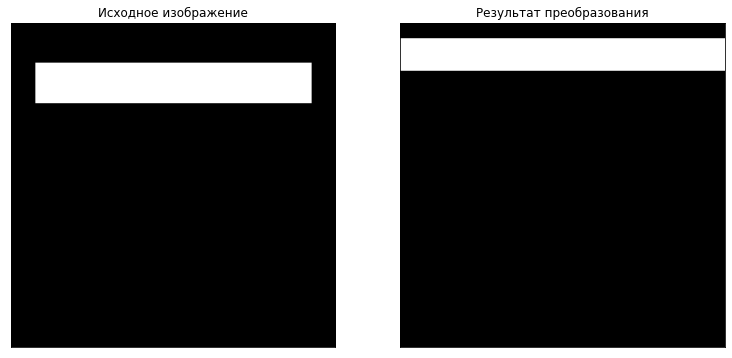

In [23]:
plot_transform_result(true_mask, pred_mask)

## Dice

In [24]:
def dice_channel(probability, truth, threshold):
    batch_size = truth.shape[0]
    channel_num = truth.shape[3]
    mean_dice_channel = 0.
    all_channels = []
    for i in range(batch_size):
        for j in range(channel_num):
            channel_dice = dice_single_channel(probability[i, :, :, j], truth[i, :, :, j], threshold)
            all_channels.append(channel_dice)
            mean_dice_channel += channel_dice/(batch_size * channel_num)
    return mean_dice_channel, all_channels


def dice_single_channel(probability, truth, threshold, eps=1E-9):
    t = (truth.flatten() > 0.5)
    p = (probability.flatten() > threshold)
    dice = (2.0 * (p * t).sum() + eps) / (p.sum() + t.sum() + eps)
    return dice

In [25]:
mean_dice, all_dice = dice_channel(np.array([pred_mask]), np.array([true_mask]), 0.5)

print('Mean Dice:', mean_dice)
print('Dice per channel:', all_dice)

Mean Dice: 0.20606060606063015
Dice per channel: [0.20606060606063015, 0.20606060606063015, 0.20606060606063015]


## Jaccard score

In [26]:
def jaccard_score(preds, labels, C, EMPTY=1., ignore=None, per_image=False):
    """
    Array of IoU for each (non ignored) class
    """
    if not per_image:
        preds, labels = (preds,), (labels,)
    ious = []
    for pred, label in zip(preds, labels):
        iou = []
        for i in range(C):
            if i != ignore: # The ignored label is sometimes among predicted classes (ENet - CityScapes)
                intersection = ((label == i) & (pred == i)).sum()
                union = ((label == i) | ((pred == i) & (label != ignore))).sum()
                if not union:
                    iou.append(EMPTY)
                else:
                    iou.append(float(intersection) / union)
        ious.append(iou)
    ious = map(np.mean, zip(*ious)) # mean accross images if per_image
    return np.array(tuple(ious))

In [27]:
iou = jaccard_score(np.array([pred_mask]), np.array([true_mask]), C=2, EMPTY=0, per_image=False)

print('Mean IoU:', iou)
# print('Dice per channel:', all_dice)

Mean IoU: [0.83269476 0.11486486]
